# First some probability measures

In [81]:
import numpy as np
from matplotlib import pylab as plt
import scipy.spatial.distance as dist
from scipy import special as spc
plt.rcParams['figure.figsize'] = 12, 8

# N = Number of Hash Functions in one bin
#

In [82]:
# basic parameters
N = 1000
D = 100
# LSH parameters
r = 2.5

# Collision probability Pr(h(Q(q))) = h(P(x)))
It is a function of r and d


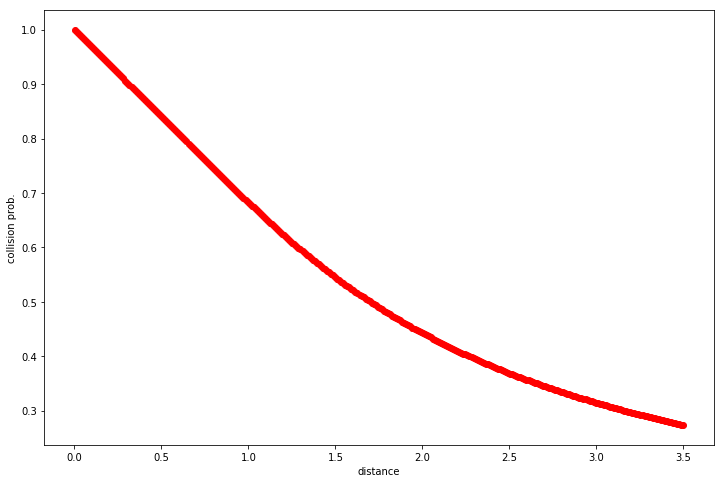

In [83]:
def pc(d, r):
    return spc.erf(r / (np.sqrt(2) * d)) - \
        np.sqrt(2/np.pi) * (d/r) * (1 - np.exp(-.5 * (r/d)**2))

x = np.linspace(.0001, (r + 1), 300)
# x is the radius r, it is varied over some range to get continuous values
y = map(lambda x: pc(x, r), x)
plt.plot(x, y, 'ro');
plt.xlabel('distance'); plt.ylabel('collision prob.')
plt.show()

In [84]:
r1 = 3.5
r2 = 4.0
#Parameter K is the number of hash functions and L is the number of bins
K_MIN, K_MAX = (2, 10)
L_MIN, L_MAX = (3, 100)


##We are trying to find minimum values of K and L 
div_min = float('inf')
for i in range(K_MIN, K_MAX):
    for l in range(L_MIN, L_MAX):
        p1 = 1. - (1. - pc(r1, r)**i)**l
        p2 = 1. - (1. - pc(r2, r)**i)**l
        f = np.log(1./p1) / np.log(1./p2)
        if f < div_min:
            div_min = f
            k_min = i
            l_min = l
print 'k_min:',k_min,'l_min:',l_min
print 'p2/p1:',(p2/p1)
print 'p1:',p1,'p2:',p2

L = l_min
k = k_min
n_hash = k * L

'''
Minimum value of K = 2
Minimum value of L = 99
'''

k_min: 2 l_min: 99
p2/p1: 0.201737051707
p1: 0.00137249069096 p2: 0.00027688222549


In [85]:
L = 10
k = 7
n_hash = k * L
p1 = 1. - (1. - pc(r1, r)**k)**L
p2 = 1. - (1. - pc(r2, r)**k)**L

print 'p1:',p1,'p2:',p2
#check: p1 and p2 values for L = 10 and K = 7

p1: 0.00166479873295 p2: 0.000479388988158


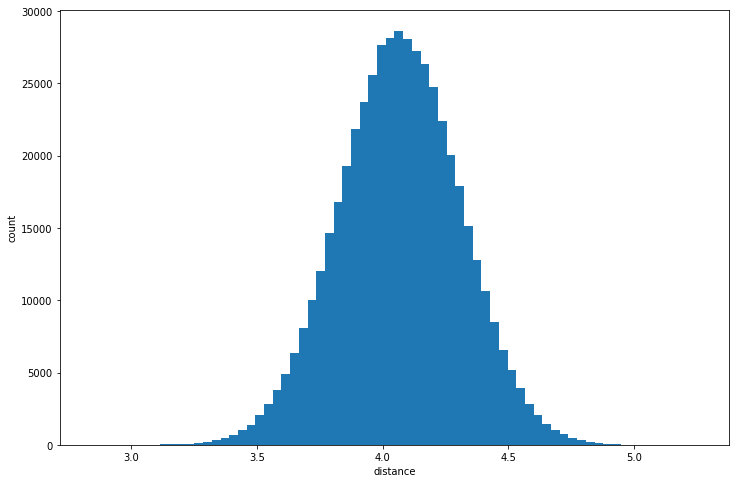

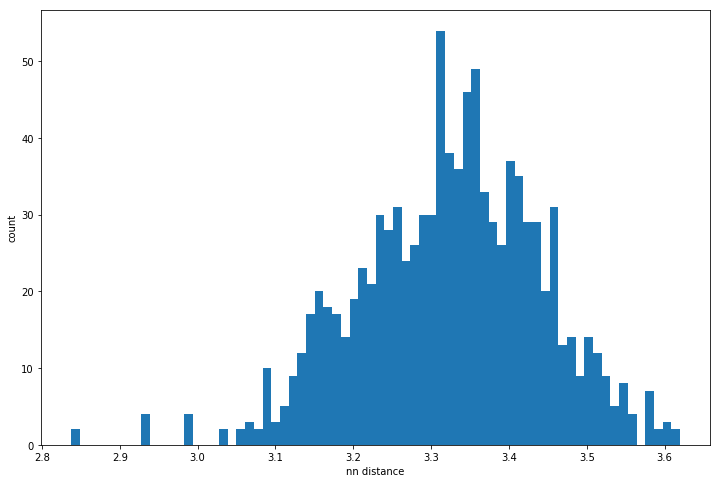

In [86]:
# data generation
#Random N data points of dimension D
N = 1000
D = 100
data = np.random.rand(N, D)
pw_data = dist.pdist(data, metric='euclidean')
#pointwise eucledian distances among all data points

pw_data_matrix = dist.squareform(pw_data)

pw_data_sorted = np.argsort(pw_data_matrix, axis=1)

dists_nn = pw_data_matrix[range(N), pw_data_sorted[:,1]]
#Near neighbours distances of data points
#Ex. (Histogram 2 below) In the plot there are 55 datapoints whose nearest neighbour is at a distance of 3.33
#Plots histograms for eucledian and near neighbour distances of each datapoints

plt.hist(pw_data, 70); 
plt.xlabel('distance'); plt.ylabel('count')
plt.show()

plt.clf()
plt.hist(dists_nn, 70)
plt.xlabel('nn distance'); plt.ylabel('count')
plt.show()

In [87]:
# hash
# hash these data points
hashed = np.random.random(size=(n_hash, D))
hashed = np.dot(data, hashed.T)
b = r * np.random.random(n_hash)
hashed = np.floor((hashed + b) / r)
print 'hashed.shape:',hashed.shape
print '(N,L,k):',(N,L,k)
hashed = hashed.reshape((N, L, k))
hashed = hashed.astype(dtype=np.int8)
print 'hashed.shape:',hashed.shape

hashed.shape: (1000, 70)
(N,L,k): (1000, 10, 7)
hashed.shape: (1000, 10, 7)


In [88]:
# fill buckets
#put the above data points into buckets
buckets = {}
for i in range(N):
    for l in range(L):
        key = tuple(hashed[i, l])
        if not key in buckets:
            buckets[key] = set([i])
        else:
            buckets[key].add(i)
# print 'buckets:',buckets
buckets_len = []
for key in buckets:
    buckets_len.append(len(buckets[key]))
buckets_len = sorted(buckets_len, reverse=True)
print 'n buckets:',len(buckets_len)
##2514 buckets were needed for hashing
print 'buckets_len[:50]:',buckets_len[:50]

n buckets: 2514
buckets_len[:50]: [85, 65, 51, 51, 50, 48, 47, 47, 46, 46, 43, 40, 40, 39, 39, 38, 36, 35, 35, 35, 35, 34, 32, 32, 32, 31, 31, 31, 31, 31, 30, 30, 30, 30, 29, 29, 29, 29, 29, 29, 29, 28, 28, 28, 28, 28, 28, 28, 28, 27]


# Maximum inner product search using Asymmetric Locality Sensitive Hashing

## For small Dataset

In [121]:
import os
import pandas as pd
import numpy as np

dataset = "datasets"+os.path.sep+"ml-latest-small"
#dataset = "datasets"+os.path.sep+"ml-latest"
name = "ratings.csv"
ratings_df = pd.read_csv(dataset + os.path.sep + name, names= ["UserID", "MovieID", "Rating", "Timestamp"], header=0)
ratings_df["UserID"] = pd.to_numeric(ratings_df["UserID"], errors='ignore')
ratings_df["MovieID"] = pd.to_numeric(ratings_df["MovieID"], errors='ignore')
ratings_df["Rating"] = pd.to_numeric(ratings_df["Rating"], errors='ignore')
ratings_df["Timestamp"] = pd.to_numeric(ratings_df["Timestamp"], errors='ignore')
R_df = ratings_df.pivot(index = 'UserID', columns ='MovieID', values = 'Rating').fillna(0)

R = R_df.as_matrix()
#user_ratings_mean = np.mean(R, axis = 1)
#R_demeaned = R - user_ratings_mean.reshape(-1, 1)


Executed on a smaller dataset at present


## Netflix Dataset

In [122]:
# import pandas as pd
# import numpy as np


# users = []
# movies_=[]
# for p_ in range(0, 17770):
#     movies_.append(p_)
    
    

# values = np.zeros((480189, 17770), dtype='float32')
# df = pd.DataFrame(data=values)

# for x in range(0, 17770):
#     name = "%07d" % (x+1,)
#     name = (str)(name)
#     name = "training_set/mv_"+name+".txt"
#     f = open(name, "r")
#     p = f.read()
#     lines = p.split('\n')
#     movie_=lines.pop(0)
#     movie_=(int)(movie_[0:-1])
#     if (movie_==x+1):
#         print(x+1)
#     for l in lines:
#         if (l != ''):
#             line1=l.split(',')
#             print(line1[0])
#             if (int)(line1[0]) not in users:
#                 users.append((int)(line1[0]))
        
#             df[x][users.index((int)(line1[0]))] = (float)(line1[1])
#     f.close()

    

    
# R_df = df.pivot(index = users, columns = movies_).fillna(0)
# R = R_df.as_matrix()
# user_ratings_mean = np.mean(R, axis = 1)
# R_demeaned = R - user_ratings_mean.reshape(-1, 1)
# from scipy import io
# io.mmwrite("Ratings_ML", R_demeaned, field='real', precision=4)


## Movielens Dataset

In [123]:
# import os
# import numpy as np
# import pandas as pd
# from scipy import sparse

# ratings_df = pd.read_csv("ratings.dat",sep="::", names= ["UserID", "MovieID", "Rating", "Timestamp"], header=0)
# ratings_df["UserID"] = pd.to_numeric(ratings_df["UserID"], errors='ignore')
# ratings_df["MovieID"] = pd.to_numeric(ratings_df["MovieID"], errors='ignore')
# ratings_df["Rating"] = pd.to_numeric(ratings_df["Rating"], errors='ignore')
# ratings_df["Timestamp"] = pd.to_numeric(ratings_df["Timestamp"], errors='ignore')
# R_df = ratings_df.pivot(index = 'UserID', columns ='MovieID', values = 'Rating').fillna(0)
# R = R_df.as_matrix()
# #user_ratings_mean = np.mean(R, axis = 1)
# #R_demeaned = R - user_ratings_mean.reshape(-1, 1)
# #from scipy import io
# #io.mmwrite("Ratings_ML", R_demeaned, field='real', precision=4)


# Test Train split



## 20% of the ratings are converted to zeroes in train data
## That 20% is our train data
## We do not need the test train split as all the model parameters are learnt through empirical methods or are randomized.



In [124]:
from scipy import sparse

# #sR = sparse.csc_matrix(R)
# TRAIN_SIZE = 0.90
# # Create boolean mask
# # np.random creates a vector of random values between 0 and 1
# # Those values are filtered to create a binary mask
# msk = np.random.rand(R.shape[0],R.shape[1]) < TRAIN_SIZE
# r = np.zeros(R.shape)
# print (msk.shape)
#
train_ratings = R.copy()
# test_ratings = R.copy()
# #mask itself is random
# train_ratings[msk] = r[msk]
# test_ratings[~msk] = r[~msk] # inverse of boolean mask

In [125]:
print(np.shape(train_ratings))
#print(np.shape(test_ratings))

(671, 9066)


In [126]:
K = 30 #Number of latent vectors
train_r = sparse.csc_matrix(train_ratings)
#test_r = sparse.csc_matrix(test_ratings)
from sparsesvd import sparsesvd
Ut, sigma, Vt = sparsesvd(train_r, K)
sigma = np.diag(sigma)
U = Ut.transpose()
U = U.dot(sigma)
# Ut2, sigma2, Vt2 = sparsesvd(test_r, K)
# sigma2 = np.diag(sigma2)
# U2 = Ut2.transpose()
# U2 = U2.dot(sigma)

In [127]:
np.save('query.npy', Vt)
np.save('dataset.npy', U)

# Preprocessing if done once, it need not be done again

In [129]:
# movielens data
import numpy as np
queries = np.load('query.npy')
data = np.load('dataset.npy')

In [130]:
D = 30
U = 0.83# Fixed. Estimated in paper by minimizing rho*
M = 3

# scale data
data_norms = np.linalg.norm(data, axis=1)
data_max_norm = np.max(data_norms)
data /= (data_max_norm / U)
#print("ok")


# normalize queries
queries_norms = np.linalg.norm(queries, axis=1)
queries_normed = (queries.T / queries_norms).T
queries = queries_normed
#print("okok")

ok
okok


In [134]:
queries = queries.transpose()

In [135]:
print(np.shape(queries))
print(np.shape(data))

(9066, 128)
(671, 128)


In [136]:
from matplotlib import pylab as plt
from collections import Counter
import utils
plt.rcParams['figure.figsize'] = 10, 7

(6083286,)
(9066, 671)
(9066, 671)
done1
(9066, 671)
(9066, 671)
(6083286,)
done2
done3


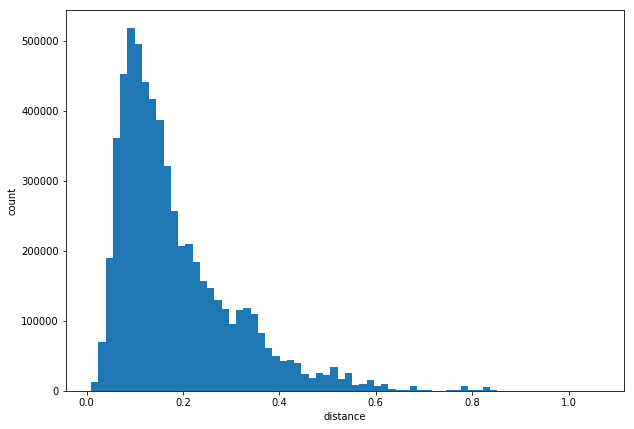

done4


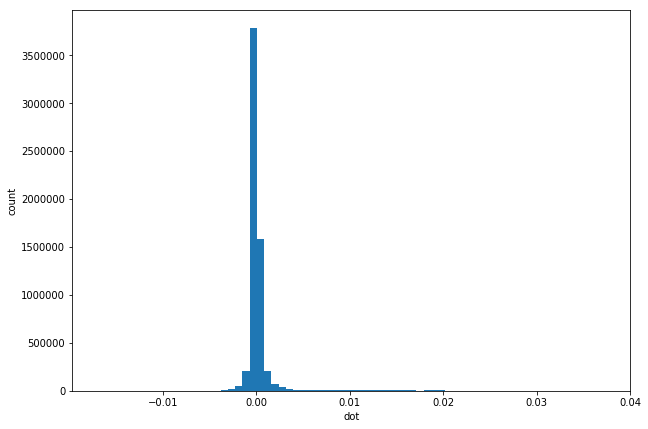

In [137]:
#There are 10000 queries and 671 data points

euclidean_matixPts, euclidean_argsPts, euclidean_Pts = utils.distances(queries, data)
# all euclidean distances between a data and a query point. total 6710000 distances

print(np.shape(euclidean_Pts))
print(np.shape(euclidean_argsPts))
print(np.shape(euclidean_matixPts))
#print("done1")
# all pair wise dot product distances between a data and a query point. total 6710000 distances
pw_dot, dot_argsPts, pw_dot_1D = utils.dot_prod(queries, data)
# too many datapoints are perpendicular to each other in euclidean space. 
#It could be due to normalisation and demeaning
print(np.shape(pw_dot))
print(np.shape(dot_argsPts))
print(np.shape(pw_dot_1D))
#print("done2")


# Histogram plots for distance vs number of pairs at that distance
plt.hist(euclidean_Pts, 70); 
#print("done3")
plt.xlabel('distance'); plt.ylabel('count');
plt.show()
plt.hist(pw_dot_1D, 70); 
#print("done4")
plt.xlabel('dot'); plt.ylabel('count');
plt.show()

# Number of hash functions in each bin = 30
# Nuber of bins = 512
For each of L2LSH, ALSH, SLSH we find the optimal value of r_min from the list r_list
Pick N hash functions of dimension D
D is the same as the dimension of latent factors


r: 1.0
top: [  0  56 114 132 527 551 552 582 595 647]
top: [ 14  53  68 539 605 632 639 656 657 670]
top: [  3 134 371 396 412 518 532 545 608 649]
top: [466 473 480 548 555 599 602 604 613 633]
top: [131 469 493 544 590 603 609 632 635 666]
top: [  4 464 522 524 534 609 611 639 644 668]
top: [131 404 518 546 581 604 615 636 641 647]
top: [246 369 406 418 438 471 509 599 615 659]
top: [367 388 433 467 495 502 506 531 577 595]
top: [ 10  15  17  22 282 464 478 567 568 572]
perf: 513.433333333
r: 1.5
top: [ 78  97 102 299 363 376 583 615 631 648]
top: [ 52 260 564 625 626 628 646 654 659 670]
top: [ 21  50 196 335 460 527 539 596 613 626]
top: [ 19 223 369 513 554 563 601 613 620 632]
top: [  3  19 195 407 425 621 640 644 657 659]
top: [ 59 292 381 612 618 623 628 635 662 667]
top: [196 311 360 539 545 616 621 629 650 663]
top: [ 51 300 359 375 381 397 407 425 601 655]
top: [ 33 195 292 300 332 407 527 538 613 632]
top: [ 33 161 215 242 258 574 597 604 617 647]
perf: 487.543333333
r: 2.0

r: 0.5
top: [ 13  15  41 131 154 246 280 384 616 667]
top: [ 10  24  49  99 121 249 396 449 578 663]
top: [ 14  56 168 381 393 474 520 553 607 626]
top: [ 26 419 447 503 507 519 620 630 633 642]
top: [  9 100 444 493 506 544 561 563 648 669]
top: [462 505 585 616 617 622 630 657 663 668]
top: [  9  24 144 181 473 481 555 600 607 670]
top: [  0 337 483 513 517 532 547 551 625 659]
top: [  8  21 127 430 463 464 507 515 620 637]
top: [  2   7  31  58  73  80  95 133 135 181]
perf: 372.29
r: 1.0
top: [  8  58  65 148 209 553 640 641 643 648]
top: [  3  10  13  15  33  96 406 628 634 663]
top: [  6  63 163 342 480 550 559 581 585 656]
top: [ 15  37  38 351 409 501 589 612 629 631]
top: [ 44  60 103 399 571 577 583 609 626 647]
top: [259 344 386 490 604 637 647 657 658 668]
top: [104 477 484 531 572 602 606 623 648 656]
top: [245 307 335 432 446 495 514 548 602 665]
top: [  2   7  96 165 185 364 424 465 505 634]
top: [ 14  25  27  34  44  49 144 206 302 456]
perf: 367.8
r: 2.0
top: [ 19  59 

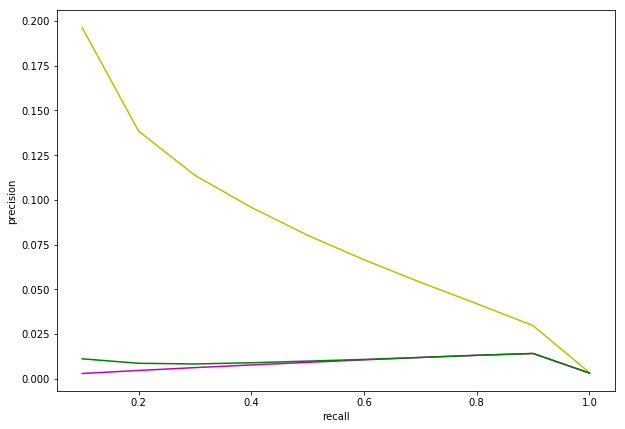

In [159]:
#L2LSH

import utils
N=30
t = T = 10
N_HASH = N
hash_L2LSH = utils.hashedFunctions(N_HASH, D)
r_list = np.array([1., 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
perf_min = np.float('inf')
r_min = 2.5#-1.
for r in r_list:
    print 'r:',r
    #hash the data using L2LSH hash functions
    hashed_data_L2LSH = utils.dataToHashFunctions(data, hash_L2LSH, r)
    #hash queries using L2LSH hash functions
    hashed_queries_L2LSH = utils.dataToHashFunctions(queries, hash_L2LSH, r)
    #returns (a^T.x + b)/r of datapoints
    pw_hashed_L2LSH, pw_hashed_args_L2LSH = utils.hammDist(hashed_queries_L2LSH, hashed_data_L2LSH)
    #returns pairwise hamming distances and their sorted counter parts
    perf = 0.0
    for k in range(N):
        top_t_inds = utils.topTindices(pw_hashed_args_L2LSH[k], dot_argsPts[k], t)
        #Returns top T matches of hashed values of data and query near neighbours and the ground truth
        if k < 10:
            print 'top:',top_t_inds
        perf += np.mean(top_t_inds)
    perf /= N
    if perf < perf_min:
        perf_min = perf
        r_min = r
    print 'perf:',perf
print 'r_min:',r_min
hashed_data_L2LSH = utils.dataToHashFunctions(data, hash_L2LSH, r_min)
#returns (a^T.x + b)/r of datapoints
hashed_queries_L2LSH = utils.dataToHashFunctions(queries, hash_L2LSH, r_min)
#returns (a^T.x + b)/r of datapoints
pw_hashed_L2LSH, pw_hashed_args_L2LSH = utils.hammDist(hashed_queries_L2LSH, hashed_data_L2LSH)

# ALSH

data_trans, queries_trans = utils.ALSHDataTransform(data, queries, M)
t = T = 10
hash_ALSH = utils.hashedFunctions(N_HASH, (D + M))#ALSH needs hashvector of dim D + M
r_list = np.array([1., 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
perf_min = np.float('inf')
r_min = -1.
for r in r_list:
    print 'r:',r
    hashed_data_ALSH = utils.dataToHashFunctions(data_trans, hash_ALSH, r)
    #returns (a^T.x + b)/r of datapoints
    hashed_queries_ALSH = utils.dataToHashFunctions(queries_trans, hash_ALSH, r)
    #returns (a^T.x + b)/r of datapoints
    pw_hashed_ALSH, pw_hashed_args_ALSH = utils.hammDist(hashed_queries_ALSH, hashed_data_ALSH)
    perf = 0.0
    for k in range(N):
        top_t_inds = utils.topTindices(pw_hashed_args_ALSH[k], dot_argsPts[k], t)
        perf += np.mean(top_t_inds)
        if k < 10:
            print 'top:',top_t_inds
    perf /= N
    if perf < perf_min:
        perf_min = perf
        r_min = r
    print 'perf:',perf
print 'r_min:',r_min
r_min = 2.5
hashed_data_ALSH = utils.dataToHashFunctions(data_trans, hash_ALSH, r_min)
hashed_queries_ALSH = utils.dataToHashFunctions(queries_trans, hash_ALSH, r_min)
pw_hashed_ALSH, pw_hashed_args_ALSH = utils.hammDist(hashed_queries_ALSH, hashed_data_ALSH)

# SLSH
F_SLSH = 3.0
t = T
hash_SLSH = hash_L2LSH
r_list = np.array([1., 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
r_list = np.array([2.5])
r_list = np.array([0.5, 1., 2.0, 2.5, 3, 4, 5.])
perf_min = np.float('inf')
r_min = -1.
for r in r_list:
    print 'r:',r
    hashed_data_SLSH = utils.dataToHashFunctions(data, hash_SLSH, r)
    hashed_queries_SLSH = utils.dataToHashFunctions(queries * F_SLSH, hash_SLSH, r)
    pw_hashed_SLSH, pw_hashed_args_SLSH = utils.hammDist(hashed_queries_SLSH, hashed_data_SLSH)
    perf = 0.0
    for k in range(N):
        top_t_inds = utils.topTindices(pw_hashed_args_SLSH[k], dot_argsPts[k], t)
        if k < 10:
            print 'top:',top_t_inds
        perf += np.mean(top_t_inds)
    perf /= N
    if perf < perf_min:
        perf_min = perf
        r_min = r
    print 'perf:',perf
print 'r_min:',r_min
hashed_data_SLSH = utils.dataToHashFunctions(data, hash_SLSH, r_min)
hashed_queries_SLSH = utils.dataToHashFunctions(queries, hash_SLSH, r_min)
pw_hashed_SLSH, pw_hashed_args_SLSH = utils.hammDist(hashed_queries_SLSH, hashed_data_SLSH)

#plots for the optimal values obtained from the above
T = 10
r = 2.5
#L2LSH
t = T
hash_L2LSH = utils.hashedFunctions(512, D)
hashed_data_L2LSH = utils.dataToHashFunctions(data, hash_L2LSH, r)
hashed_queries_L2LSH = utils.dataToHashFunctions(queries, hash_L2LSH, r)
hashed_L2LSHPts, hashed_args_L2LSH = utils.hammDist(hashed_queries_L2LSH, hashed_data_L2LSH)
# ALSH
data_trans, queries_trans = utils.ALSHDataTransform(data, queries, M)
t = T
hash_ALSH = utils.hashedFunctions(512, (D + M))
hashed_data_ALSH = utils.dataToHashFunctions(data_trans, hash_ALSH, r)
hashed_queries_ALSH = utils.dataToHashFunctions(queries_trans, hash_ALSH, r)
hashed_ALSHPts, hashed_args_ALSH = utils.hammDist(hashed_queries_ALSH, hashed_data_ALSH)
# SLSH
hash_SLSH = utils.hashedFunctions(512, D)
hashed_data_SLSH = utils.dataToHashFunctions(data, hash_SLSH, r)
hashed_queries_SLSH = utils.dataToHashFunctions(queries, hash_SLSH, r)
hashed_SLSHPts, hashed_args_SLSH = utils.hammDist(hashed_queries_SLSH, hashed_data_SLSH)
recall = np.linspace(1./T, 1, T)
plt.clf()
print 'prec L2LSH...'
prec_L2LSH = utils.precisionRecall(hashed_args_L2LSH, dot_argsPts, T)
print 'prec ALSH...'
prec_ALSH = utils.precisionRecall(hashed_args_ALSH, dot_argsPts, T)
print 'prec SLSH...'
prec_SLSH = utils.precisionRecall(hashed_args_SLSH, dot_argsPts, T)
plt.xlabel('recall'); plt.ylabel('precision');

plt.plot(recall, prec_L2LSH, 'm' ,label='L2LSH');
plt.plot(recall, prec_ALSH,'y', label='ALSH');
plt.plot(recall, prec_SLSH,'g', label='SLSH');
plt.show()
#In the graph, magenta represnets L2LSH, yellow represents ALSH and green represents SLSH

# Similar to above, here
# Number of hash functions in each bin = 64
# Nuber of bins = 512
For each of L2LSH, ALSH, SLSH we find the optimal value of r_min from the list r_list
Pick N hash functions of dimension D
D is the same as the dimension of latent factors


r: 1.0
top: [  4   7   8  46  60  83 250 562 586 646]
top: [  5  11  48 579 593 601 607 622 639 663]
top: [  0   1  10 203 424 438 499 514 531 579]
top: [425 451 563 571 609 613 617 618 619 652]
top: [  0 278 471 519 528 603 628 636 644 666]
top: [455 509 558 588 620 621 637 639 646 667]
top: [  0  27 290 457 480 508 510 601 630 643]
top: [388 389 406 431 470 497 590 609 629 664]
top: [295 378 386 425 453 506 516 575 611 646]
top: [  7  14  52 165 268 500 558 614 659 663]
perf: 522.621875
r: 1.5
top: [  6   9  25  28  30  67 560 581 589 627]
top: [156 346 513 529 580 586 597 608 615 659]
top: [  3   4 106 241 366 441 554 606 621 622]
top: [322 473 569 594 596 598 605 614 623 666]
top: [  5   8 116 544 599 606 630 639 645 667]
top: [565 572 601 612 615 617 622 624 632 668]
top: [  0   2 441 508 546 592 600 603 637 651]
top: [234 256 328 330 388 528 584 614 625 668]
top: [ 89 258 297 465 488 519 546 566 597 660]
top: [228 243 510 549 551 567 586 619 622 662]
perf: 502.3796875
r: 2.0
top:

top: [ 71  86 112 130 270 307 406 514 568 629]
top: [ 48  92 147 153 264 270 370 607 624 669]
top: [ 33  48 165 202 396 399 464 512 583 650]
top: [ 33 209 229 270 383 387 506 609 624 629]
top: [ 33  37 105 147 202 215 429 447 458 640]
top: [ 73  77 199 213 303 321 377 409 481 513]
top: [105 202 270 329 370 396 406 512 520 568]
top: [ 48 242 270 330 363 409 429 447 615 618]
top: [ 25 202 229 303 330 383 399 429 512 583]
top: [ 25  53 147 174 194 226 289 290 488 598]
perf: 356.515625
r_min: 4.5
r: 0.5
top: [  7  60  64 124 125 157 328 514 531 534]
top: [ 13  94 217 309 470 482 536 571 626 646]
top: [  2   6  36 291 311 414 488 576 591 599]
top: [490 521 553 572 575 615 629 633 648 659]
top: [ 37 283 312 471 561 579 586 602 636 651]
top: [ 11  23  39 165 279 362 382 454 602 614]
top: [  0  23  30  43 150 164 242 532 601 621]
top: [386 436 486 544 574 604 606 610 645 648]
top: [341 392 409 507 599 631 636 644 648 650]
top: [  6  45  49  55 106 216 271 507 580 654]
perf: 448.6828125
r: 1.0


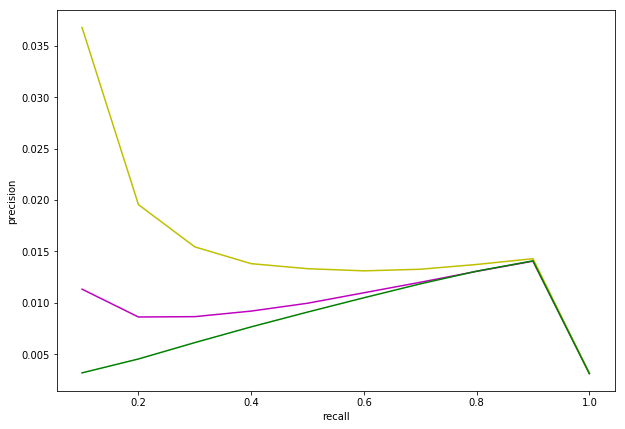

In [164]:
#L2LSH
import utils
N=64
t = T = 10
N_HASH = N
hash_L2LSH = utils.hashedFunctions(N_HASH, D)
r_list = np.array([1., 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
perf_min = np.float('inf')
r_min = 2.5#-1.
for r in r_list:
    print 'r:',r
    hashed_data_L2LSH = utils.dataToHashFunctions(data, hash_L2LSH, r)
    hashed_queries_L2LSH = utils.dataToHashFunctions(queries, hash_L2LSH, r)
    pw_hashed_L2LSH, pw_hashed_args_L2LSH = utils.hammDist(hashed_queries_L2LSH, hashed_data_L2LSH)
    perf = 0.0
    for k in range(N):
        top_t_inds = utils.topTindices(pw_hashed_args_L2LSH[k], dot_argsPts[k], t)
        if k < 10:
            print 'top:',top_t_inds
        perf += np.mean(top_t_inds)
    perf /= N
    if perf < perf_min:
        perf_min = perf
        r_min = r
    print 'perf:',perf
print 'r_min:',r_min
hashed_data_L2LSH = utils.dataToHashFunctions(data, hash_L2LSH, r_min)
hashed_queries_L2LSH = utils.dataToHashFunctions(queries, hash_L2LSH, r_min)
pw_hashed_L2LSH, pw_hashed_args_L2LSH = utils.hammDist(hashed_queries_L2LSH, hashed_data_L2LSH)

# ALSH

data_trans, queries_trans = utils.ALSHDataTransform(data, queries, M)
t = T = 10
hash_ALSH = utils.hashedFunctions(N_HASH, (D + M))
r_list = np.array([1., 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
perf_min = np.float('inf')
r_min = -1.
for r in r_list:
    print 'r:',r
    hashed_data_ALSH = utils.dataToHashFunctions(data_trans, hash_ALSH, r)
    hashed_queries_ALSH = utils.dataToHashFunctions(queries_trans, hash_ALSH, r)
    pw_hashed_ALSH, pw_hashed_args_ALSH = utils.hammDist(hashed_queries_ALSH, hashed_data_ALSH)
    perf = 0.0
    for k in range(N):
        top_t_inds = utils.topTindices(pw_hashed_args_ALSH[k], dot_argsPts[k], t)
        perf += np.mean(top_t_inds)
        if k < 10:
            print 'top:',top_t_inds
    perf /= N
    if perf < perf_min:
        perf_min = perf
        r_min = r
    print 'perf:',perf
print 'r_min:',r_min
r_min = 2.5
hashed_data_ALSH = utils.dataToHashFunctions(data_trans, hash_ALSH, r_min)
hashed_queries_ALSH = utils.dataToHashFunctions(queries_trans, hash_ALSH, r_min)
pw_hashed_ALSH, pw_hashed_args_ALSH = utils.hammDist(hashed_queries_ALSH, hashed_data_ALSH)

# SLSH
F_SLSH = 3.0
t = T
hash_SLSH = hash_L2LSH
r_list = np.array([1., 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
r_list = np.array([2.5])
r_list = np.array([0.5, 1., 2.0, 2.5, 3, 4, 5.])
perf_min = np.float('inf')
r_min = -1.
for r in r_list:
    print 'r:',r
    hashed_data_SLSH = utils.dataToHashFunctions(data, hash_SLSH, r)
    hashed_queries_SLSH = utils.dataToHashFunctions(queries * F_SLSH, hash_SLSH, r)
    pw_hashed_SLSH, pw_hashed_args_SLSH = utils.hammDist(hashed_queries_SLSH, hashed_data_SLSH)
    perf = 0.0
    for k in range(N):
        top_t_inds = utils.topTindices(pw_hashed_args_SLSH[k], dot_argsPts[k], t)
        if k < 10:
            print 'top:',top_t_inds
        perf += np.mean(top_t_inds)
    perf /= N
    if perf < perf_min:
        perf_min = perf
        r_min = r
    print 'perf:',perf
print 'r_min:',r_min
hashed_data_SLSH = utils.dataToHashFunctions(data, hash_SLSH, r_min)
hashed_queries_SLSH = utils.dataToHashFunctions(queries, hash_SLSH, r_min)
pw_hashed_SLSH, pw_hashed_args_SLSH = utils.hammDist(hashed_queries_SLSH, hashed_data_SLSH)


T = 10
r = 2.5
#L2LSH
t = T
hash_L2LSH = utils.hashedFunctions(512, D)
hashed_data_L2LSH = utils.dataToHashFunctions(data, hash_L2LSH, r)
hashed_queries_L2LSH = utils.dataToHashFunctions(queries, hash_L2LSH, r)
hashed_L2LSHPts, hashed_args_L2LSH = utils.hammDist(hashed_queries_L2LSH, hashed_data_L2LSH)
# ALSH
data_trans, queries_trans = utils.ALSHDataTransform(data, queries, M)
t = T
hash_ALSH = utils.hashedFunctions(512, (D + M))
hashed_data_ALSH = utils.dataToHashFunctions(data_trans, hash_ALSH, r)
hashed_queries_ALSH = utils.dataToHashFunctions(queries_trans, hash_ALSH, r)
hashed_ALSHPts, hashed_args_ALSH = utils.hammDist(hashed_queries_ALSH, hashed_data_ALSH)
# SLSH
hash_SLSH = utils.hashedFunctions(512, D)
hashed_data_SLSH = utils.dataToHashFunctions(data, hash_SLSH, r)
hashed_queries_SLSH = utils.dataToHashFunctions(queries, hash_SLSH, r)
hashed_SLSHPts, hashed_args_SLSH = utils.hammDist(hashed_queries_SLSH, hashed_data_SLSH)
recall = np.linspace(1./T, 1, T)
plt.clf()
print 'prec L2LSH...'
prec_L2LSH = utils.precisionRecall(hashed_args_L2LSH, dot_argsPts, T)
print 'prec ALSH...'
prec_ALSH = utils.precisionRecall(hashed_args_ALSH, dot_argsPts, T)
print 'prec SLSH...'
prec_SLSH = utils.precisionRecall(hashed_args_SLSH, dot_argsPts, T)
plt.xlabel('recall'); plt.ylabel('precision');

plt.plot(recall, prec_L2LSH, 'm' ,label='L2LSH');
plt.plot(recall, prec_ALSH,'y', label='ALSH');
plt.plot(recall, prec_SLSH,'g', label='SLSH');
plt.show()

# Similar to above, here
# Number of hash functions in each bin = 64
# Nuber of bins = 512
For each of L2LSH, ALSH, SLSH we find the optimal value of r_min from the list r_list
Pick N hash functions of dimension D
D is the same as the dimension of latent factors


r: 1.0
top: [263 325 357 466 488 533 561 629 661 667]
top: [199 243 390 520 523 548 557 661 664 670]
top: [501 509 584 605 611 615 620 656 657 661]
top: [254 343 357 419 472 517 533 578 659 670]
top: [516 568 569 572 607 612 616 637 654 660]
top: [380 400 438 473 497 515 532 562 595 610]
top: [399 483 570 580 583 627 634 662 665 668]
top: [480 487 514 530 539 580 599 613 637 670]
top: [381 445 507 517 532 540 547 560 604 605]
top: [412 433 519 550 560 565 569 629 669 670]
perf: 537.8703125
r: 1.5
top: [  7  28  36  99 311 581 588 613 621 644]
top: [  0   1   9 152 571 587 596 625 631 668]
top: [  5   7 107 182 364 543 545 558 609 637]
top: [469 509 524 560 588 599 605 609 630 631]
top: [171 535 554 577 601 614 633 651 653 665]
top: [ 10 561 591 600 610 634 640 647 655 666]
top: [  2 178 556 568 583 584 592 606 640 656]
top: [326 354 514 525 526 529 573 582 647 648]
top: [ 89 171 258 295 367 483 580 595 610 636]
top: [  2  14 238 519 574 602 603 606 654 666]
perf: 479.8078125
r: 2.0
top

top: [ 71  86 112 130 270 307 406 568 588 629]
top: [ 48  92 147 153 264 270 338 369 607 624]
top: [ 33  48 165 202 396 399 481 512 583 652]
top: [ 33 209 229 270 383 387 506 609 624 629]
top: [ 33  37 105 147 202 215 429 447 458 639]
top: [ 73  77 199 213 303 321 377 409 463 514]
top: [105 202 270 329 369 396 406 512 520 568]
top: [ 48 242 270 330 362 409 429 447 615 618]
top: [ 25 202 229 303 330 383 399 429 512 583]
top: [ 25  53 147 174 194 226 289 290 488 598]
perf: 343.4515625
r_min: 2.5
r: 0.5
top: [ 32  38 161 176 240 246 250 306 397 446]
top: [ 60 101 199 222 283 345 459 508 532 602]
top: [  6   9  12 239 329 385 486 518 555 572]
top: [210 230 233 264 291 311 348 424 638 654]
top: [ 34  66  70 218 219 360 396 499 539 598]
top: [  0  74  82 141 160 302 448 537 627 628]
top: [184 297 309 387 451 478 593 602 603 618]
top: [231 355 443 445 468 543 544 580 639 656]
top: [254 272 380 408 460 467 481 487 520 538]
top: [  5  16 263 265 396 531 565 575 614 645]
perf: 421.14375
r: 1.0
t

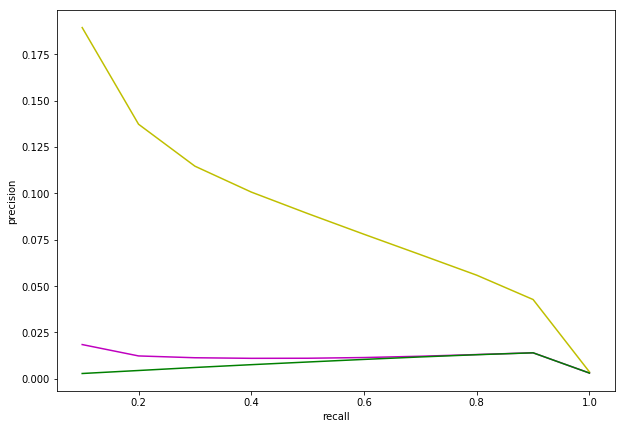

In [166]:
#L2LSH
import utils
N=64
t = T = 10
N_HASH = N
hash_L2LSH = utils.hashedFunctions(N_HASH, D)
r_list = np.array([1., 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
perf_min = np.float('inf')
r_min = 2.5#-1.
for r in r_list:
    print 'r:',r
    hashed_data_L2LSH = utils.dataToHashFunctions(data, hash_L2LSH, r)
    hashed_queries_L2LSH = utils.dataToHashFunctions(queries, hash_L2LSH, r)
    pw_hashed_L2LSH, pw_hashed_args_L2LSH = utils.hammDist(hashed_queries_L2LSH, hashed_data_L2LSH)
    perf = 0.0
    for k in range(N):
        top_t_inds = utils.topTindices(pw_hashed_args_L2LSH[k], dot_argsPts[k], t)
        if k < 10:
            print 'top:',top_t_inds
        perf += np.mean(top_t_inds)
    perf /= N
    if perf < perf_min:
        perf_min = perf
        r_min = r
    print 'perf:',perf
print 'r_min:',r_min
hashed_data_L2LSH = utils.dataToHashFunctions(data, hash_L2LSH, r_min)
hashed_queries_L2LSH = utils.dataToHashFunctions(queries, hash_L2LSH, r_min)
pw_hashed_L2LSH, pw_hashed_args_L2LSH = utils.hammDist(hashed_queries_L2LSH, hashed_data_L2LSH)

# ALSH

data_trans, queries_trans = utils.ALSHDataTransform(data, queries, M)
t = T = 10
hash_ALSH = utils.hashedFunctions(N_HASH, (D + M))
r_list = np.array([1., 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
perf_min = np.float('inf')
r_min = -1.
for r in r_list:
    print 'r:',r
    hashed_data_ALSH = utils.dataToHashFunctions(data_trans, hash_ALSH, r)
    hashed_queries_ALSH = utils.dataToHashFunctions(queries_trans, hash_ALSH, r)
    pw_hashed_ALSH, pw_hashed_args_ALSH = utils.hammDist(hashed_queries_ALSH, hashed_data_ALSH)
    perf = 0.0
    for k in range(N):
        top_t_inds = utils.topTindices(pw_hashed_args_ALSH[k], dot_argsPts[k], t)
        perf += np.mean(top_t_inds)
        if k < 10:
            print 'top:',top_t_inds
    perf /= N
    if perf < perf_min:
        perf_min = perf
        r_min = r
    print 'perf:',perf
print 'r_min:',r_min
r_min = 2.5
hashed_data_ALSH = utils.dataToHashFunctions(data_trans, hash_ALSH, r_min)
hashed_queries_ALSH = utils.dataToHashFunctions(queries_trans, hash_ALSH, r_min)
pw_hashed_ALSH, pw_hashed_args_ALSH = utils.hammDist(hashed_queries_ALSH, hashed_data_ALSH)

# SLSH
F_SLSH = 3.0
t = T
hash_SLSH = hash_L2LSH
r_list = np.array([1., 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
r_list = np.array([2.5])
r_list = np.array([0.5, 1., 2.0, 2.5, 3, 4, 5.])
perf_min = np.float('inf')
r_min = -1.
for r in r_list:
    print 'r:',r
    hashed_data_SLSH = utils.dataToHashFunctions(data, hash_SLSH, r)
    hashed_queries_SLSH = utils.dataToHashFunctions(queries * F_SLSH, hash_SLSH, r)
    pw_hashed_SLSH, pw_hashed_args_SLSH = utils.hammDist(hashed_queries_SLSH, hashed_data_SLSH)
    perf = 0.0
    for k in range(N):
        top_t_inds = utils.topTindices(pw_hashed_args_SLSH[k], dot_argsPts[k], t)
        if k < 10:
            print 'top:',top_t_inds
        perf += np.mean(top_t_inds)
    perf /= N
    if perf < perf_min:
        perf_min = perf
        r_min = r
    print 'perf:',perf
print 'r_min:',r_min
hashed_data_SLSH = utils.dataToHashFunctions(data, hash_SLSH, r_min)
hashed_queries_SLSH = utils.dataToHashFunctions(queries, hash_SLSH, r_min)
pw_hashed_SLSH, pw_hashed_args_SLSH = utils.hammDist(hashed_queries_SLSH, hashed_data_SLSH)


T = 10
r = 2.5
#L2LSH
t = T
hash_L2LSH = utils.hashedFunctions(512, D)
hashed_data_L2LSH = utils.dataToHashFunctions(data, hash_L2LSH, r)
hashed_queries_L2LSH = utils.dataToHashFunctions(queries, hash_L2LSH, r)
hashed_L2LSHPts, hashed_args_L2LSH = utils.hammDist(hashed_queries_L2LSH, hashed_data_L2LSH)
# ALSH
data_trans, queries_trans = utils.ALSHDataTransform(data, queries, M)
t = T
hash_ALSH = utils.hashedFunctions(512, (D + M))
hashed_data_ALSH = utils.dataToHashFunctions(data_trans, hash_ALSH, r)
hashed_queries_ALSH = utils.dataToHashFunctions(queries_trans, hash_ALSH, r)
hashed_ALSHPts, hashed_args_ALSH = utils.hammDist(hashed_queries_ALSH, hashed_data_ALSH)
# SLSH
hash_SLSH = utils.hashedFunctions(512, D)
hashed_data_SLSH = utils.dataToHashFunctions(data, hash_SLSH, r)
hashed_queries_SLSH = utils.dataToHashFunctions(queries, hash_SLSH, r)
hashed_SLSHPts, hashed_args_SLSH = utils.hammDist(hashed_queries_SLSH, hashed_data_SLSH)
recall = np.linspace(1./T, 1, T)
plt.clf()
print 'prec L2LSH...'
prec_L2LSH = utils.precisionRecall(hashed_args_L2LSH, dot_argsPts, T)
print 'prec ALSH...'
prec_ALSH = utils.precisionRecall(hashed_args_ALSH, dot_argsPts, T)
print 'prec SLSH...'
prec_SLSH = utils.precisionRecall(hashed_args_SLSH, dot_argsPts, T)
plt.xlabel('recall'); plt.ylabel('precision');

plt.plot(recall, prec_L2LSH, 'm' ,label='L2LSH');
plt.plot(recall, prec_ALSH,'y', label='ALSH');
plt.plot(recall, prec_SLSH,'g', label='SLSH');
plt.show()

# Similar to above, here
# Number of hash functions in each bin = 16
# Nuber of bins = 512
For each of L2LSH, ALSH, SLSH we find the optimal value of r_min from the list r_list
Pick N hash functions of dimension D
D is the same as the dimension of latent factors


r: 1.0
top: [130 238 438 564 568 573 596 605 619 637]
top: [570 585 586 596 600 601 621 631 646 650]
top: [385 399 414 528 539 570 572 628 661 667]
top: [375 533 546 565 590 606 608 627 639 661]
top: [521 537 558 565 566 623 628 658 659 668]
top: [272 474 562 595 603 612 622 624 625 661]
top: [411 537 581 594 611 627 629 639 643 644]
top: [251 471 473 485 497 500 508 550 556 628]
top: [366 422 428 548 550 556 560 610 627 661]
top: [385 556 572 641 644 649 650 655 668 670]
perf: 560.93125
r: 1.5
top: [  0  24  25  94 120 123 317 324 392 664]
top: [  1   2  59 100 154 159 314 594 634 667]
top: [  4  25  55 175 223 359 393 545 572 629]
top: [  0  47 219 239 395 512 579 598 652 659]
top: [  1   3  14  35 155 157 208 418 616 630]
top: [  9  72 307 347 395 503 636 637 639 651]
top: [  0   1   3   9  11  18 215 387 504 512]
top: [  8  12  60 301 315 388 391 411 416 490]
top: [  9  37 212 220 309 316 350 421 501 568]
top: [ 36 146 163 249 250 577 634 645 653 664]
perf: 327.45
r: 2.0
top: [ 74 

r: 0.5
top: [  5 107 232 553 579 608 637 644 646 649]
top: [  2  12  47  51  85 105 108 424 627 640]
top: [ 47  77  92 124 149 164 212 214 426 639]
top: [ 20  35 204 314 475 498 510 553 557 634]
top: [  1  28 136 145 210 222 445 606 642 668]
top: [ 18  23  41  43  64  69 124 180 186 200]
top: [  6 123 184 320 368 452 500 584 632 657]
top: [300 317 409 425 444 458 480 483 602 625]
top: [  2   4  10  11  18  27 399 474 475 646]
top: [166 227 273 435 525 574 657 659 663 670]
perf: 363.28125
r: 1.0
top: [ 91 136 272 307 366 388 505 554 610 661]
top: [ 15  19  33  73 124 165 314 337 617 621]
top: [  1   7  21  27  28  69  86 119 205 303]
top: [312 339 367 467 475 482 496 498 544 646]
top: [ 24  96 120 145 169 371 503 529 561 663]
top: [ 33 116 128 337 356 468 630 632 640 670]
top: [  1  88 170 171 210 292 328 485 535 631]
top: [248 366 396 416 437 445 506 513 530 625]
top: [356 360 449 455 457 525 533 575 597 658]
top: [365 423 439 547 602 617 633 639 655 663]
perf: 387.76875
r: 2.0
top: [ 

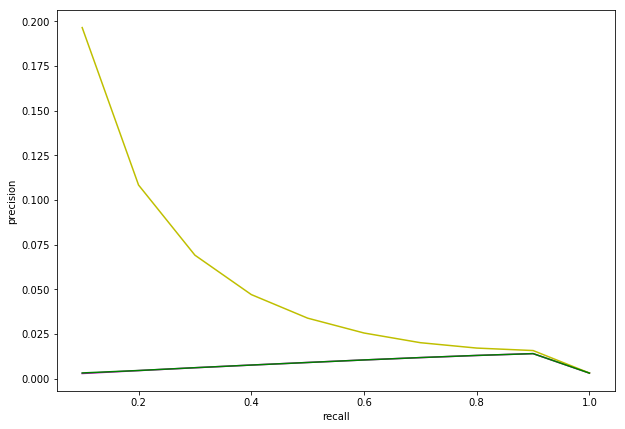

In [169]:
#L2LSH
import utils
N=16
t = T = 10
N_HASH = N
hash_L2LSH = utils.hashedFunctions(N_HASH, D)
r_list = np.array([1., 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
perf_min = np.float('inf')
r_min = 2.5#-1.
for r in r_list:
    print 'r:',r
    hashed_data_L2LSH = utils.dataToHashFunctions(data, hash_L2LSH, r)
    hashed_queries_L2LSH = utils.dataToHashFunctions(queries, hash_L2LSH, r)
    pw_hashed_L2LSH, pw_hashed_args_L2LSH = utils.hammDist(hashed_queries_L2LSH, hashed_data_L2LSH)
    perf = 0.0
    for k in range(N):
        top_t_inds = utils.topTindices(pw_hashed_args_L2LSH[k], dot_argsPts[k], t)
        if k < 10:
            print 'top:',top_t_inds
        perf += np.mean(top_t_inds)
    perf /= N
    if perf < perf_min:
        perf_min = perf
        r_min = r
    print 'perf:',perf
print 'r_min:',r_min
hashed_data_L2LSH = utils.dataToHashFunctions(data, hash_L2LSH, r_min)
hashed_queries_L2LSH = utils.dataToHashFunctions(queries, hash_L2LSH, r_min)
pw_hashed_L2LSH, pw_hashed_args_L2LSH = utils.hammDist(hashed_queries_L2LSH, hashed_data_L2LSH)

# ALSH

data_trans, queries_trans = utils.ALSHDataTransform(data, queries, M)
t = T = 10
hash_ALSH = utils.hashedFunctions(N_HASH, (D + M))
r_list = np.array([1., 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
perf_min = np.float('inf')
r_min = -1.
for r in r_list:
    print 'r:',r
    hashed_data_ALSH = utils.dataToHashFunctions(data_trans, hash_ALSH, r)
    hashed_queries_ALSH = utils.dataToHashFunctions(queries_trans, hash_ALSH, r)
    pw_hashed_ALSH, pw_hashed_args_ALSH = utils.hammDist(hashed_queries_ALSH, hashed_data_ALSH)
    perf = 0.0
    for k in range(N):
        top_t_inds = utils.topTindices(pw_hashed_args_ALSH[k], dot_argsPts[k], t)
        perf += np.mean(top_t_inds)
        if k < 10:
            print 'top:',top_t_inds
    perf /= N
    if perf < perf_min:
        perf_min = perf
        r_min = r
    print 'perf:',perf
print 'r_min:',r_min
r_min = 2.5
hashed_data_ALSH = utils.dataToHashFunctions(data_trans, hash_ALSH, r_min)
hashed_queries_ALSH = utils.dataToHashFunctions(queries_trans, hash_ALSH, r_min)
pw_hashed_ALSH, pw_hashed_args_ALSH = utils.hammDist(hashed_queries_ALSH, hashed_data_ALSH)

# SLSH
F_SLSH = 3.0
t = T
hash_SLSH = hash_L2LSH
r_list = np.array([1., 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
r_list = np.array([2.5])
r_list = np.array([0.5, 1., 2.0, 2.5, 3, 4, 5.])
perf_min = np.float('inf')
r_min = -1.
for r in r_list:
    print 'r:',r
    hashed_data_SLSH = utils.dataToHashFunctions(data, hash_SLSH, r)
    hashed_queries_SLSH = utils.dataToHashFunctions(queries * F_SLSH, hash_SLSH, r)
    pw_hashed_SLSH, pw_hashed_args_SLSH = utils.hammDist(hashed_queries_SLSH, hashed_data_SLSH)
    perf = 0.0
    for k in range(N):
        top_t_inds = utils.topTindices(pw_hashed_args_SLSH[k], dot_argsPts[k], t)
        if k < 10:
            print 'top:',top_t_inds
        perf += np.mean(top_t_inds)
    perf /= N
    if perf < perf_min:
        perf_min = perf
        r_min = r
    print 'perf:',perf
print 'r_min:',r_min
hashed_data_SLSH = utils.dataToHashFunctions(data, hash_SLSH, r_min)
hashed_queries_SLSH = utils.dataToHashFunctions(queries, hash_SLSH, r_min)
pw_hashed_SLSH, pw_hashed_args_SLSH = utils.hammDist(hashed_queries_SLSH, hashed_data_SLSH)


T = 10
r = 2.5
#L2LSH
t = T
hash_L2LSH = utils.hashedFunctions(512, D)
hashed_data_L2LSH = utils.dataToHashFunctions(data, hash_L2LSH, r)
hashed_queries_L2LSH = utils.dataToHashFunctions(queries, hash_L2LSH, r)
hashed_L2LSHPts, hashed_args_L2LSH = utils.hammDist(hashed_queries_L2LSH, hashed_data_L2LSH)
# ALSH
data_trans, queries_trans = utils.ALSHDataTransform(data, queries, M)
t = T
hash_ALSH = utils.hashedFunctions(512, (D + M))
hashed_data_ALSH = utils.dataToHashFunctions(data_trans, hash_ALSH, r)
hashed_queries_ALSH = utils.dataToHashFunctions(queries_trans, hash_ALSH, r)
hashed_ALSHPts, hashed_args_ALSH = utils.hammDist(hashed_queries_ALSH, hashed_data_ALSH)
# SLSH
hash_SLSH = utils.hashedFunctions(512, D)
hashed_data_SLSH = utils.dataToHashFunctions(data, hash_SLSH, r)
hashed_queries_SLSH = utils.dataToHashFunctions(queries, hash_SLSH, r)
hashed_SLSHPts, hashed_args_SLSH = utils.hammDist(hashed_queries_SLSH, hashed_data_SLSH)
recall = np.linspace(1./T, 1, T)
plt.clf()
print 'prec L2LSH...'
prec_L2LSH = utils.precisionRecall(hashed_args_L2LSH, dot_argsPts, T)
print 'prec ALSH...'
prec_ALSH = utils.precisionRecall(hashed_args_ALSH, dot_argsPts, T)
print 'prec SLSH...'
prec_SLSH = utils.precisionRecall(hashed_args_SLSH, dot_argsPts, T)
plt.xlabel('recall'); plt.ylabel('precision');

plt.plot(recall, prec_L2LSH, 'm' ,label='L2LSH');
plt.plot(recall, prec_ALSH,'y', label='ALSH');
plt.plot(recall, prec_SLSH,'g', label='SLSH');
plt.show()